# Import

In [1]:
# Basic
import pandas as pd
import numpy as np

import warnings

warnings.simplefilter('ignore')

# ML Toolkit
from robusta.optimizer import GridSearchCV, RandomSearchCV, OptunaCV
from robusta.crossval import crossval_predict

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

# Model
from lightgbm import LGBMRegressor

# Plot
from jupyterthemes import jtplot
import matplotlib

jtplot.style('gruvboxd')
matplotlib.use('nbagg')

# Data

In [2]:
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=666)

X = pd.DataFrame(X)
y = pd.Series(y)

X.rename(columns=lambda x: 'x{}'.format(x), inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
X_train

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9
29,-3.135568,-0.682559,-0.740026,-1.565277,0.653032,-0.910702,-1.571373,-0.106283,-0.794989,0.250017
535,-0.220983,1.681607,1.541841,-0.190491,1.520588,0.938335,1.503033,-0.538354,0.116053,0.690656
695,-0.106349,-0.442650,1.933125,-0.034856,0.534739,-0.296531,0.372608,-0.541009,-0.653288,0.318019
557,-0.523181,-0.478655,0.176158,-0.245387,1.144202,0.284027,1.830700,0.202389,-0.491186,0.489575
836,2.244197,1.225454,-0.828965,-0.111927,0.375417,0.444073,-0.835202,-0.458208,0.612965,-0.562706
...,...,...,...,...,...,...,...,...,...,...
106,0.394877,-1.394822,0.255025,0.818061,-0.053974,0.193075,-0.785655,0.108597,0.451189,-0.765413
270,-0.008923,-0.601086,-0.054966,0.985366,-0.052347,-0.303155,0.076224,-0.498821,-0.466354,-1.514645
860,-1.305500,3.159843,-0.985534,-1.357325,-0.480135,0.096085,-1.149118,0.994904,-0.804308,-1.595492
435,0.470365,-1.164993,-0.227289,-1.143914,2.274234,-0.661404,-2.009812,0.882182,-1.717222,0.064218


# Task

In [4]:
get_score = lambda y_true, y_pred: -mean_squared_error(y_true, y_pred)
scoring = 'neg_mean_squared_error'

cv = 5

# Baseline

In [5]:
model = LGBMRegressor()

In [6]:
_, y_pred = crossval_predict(model, cv, X_train, y_train, X_new=X_test,
                             scoring=scoring, verbose=2, n_jobs=None)

get_score(y_test, y_pred)

[06:39:30]  LGBMRegressor

[06:39:30]  FOLD  0:   -1849.9203
[06:39:30]  FOLD  1:   -985.8744
[06:39:30]  FOLD  2:   -1560.7978
[06:39:31]  FOLD  3:   -1821.7524
[06:39:31]  FOLD  4:   -1409.5014

[06:39:31]  AVERAGE:   -1525.5693 ± 315.8833



-1294.5736816744054

# Optimizer

## Grid Search

In [7]:
model = LGBMRegressor()

# https://lightgbm.readthedocs.io/en/latest/Parameters.html
param_space = {
    'learning_rate': 0.2,
    'max_depth': (4, 12, 2),
    
    'bagging_fraction': (0.2, 0.8, 0.2),
    'feature_fraction': (0.2, 0.8, 0.2),
}

optimizer = GridSearchCV(model, cv, scoring, param_space=param_space, verbose=2)
optimizer.fit(X_train, y_train)

model = optimizer.best_estimator_

[06:39:31] ITER: 1/80      SCORE: -1874.0342 ± 225.4839      ETA: 21 sec
bagging_fraction    0.2
feature_fraction    0.2
learning_rate       0.2
max_depth             4
dtype: object

[06:39:32] ITER: 2/80      SCORE: -2918.6195 ± 254.5045      ETA: 20 sec
bagging_fraction    0.2
feature_fraction    0.2
learning_rate       0.2
max_depth             6
dtype: object

[06:39:32] ITER: 3/80      SCORE: -3442.7426 ± 229.3320      ETA: 23 sec
bagging_fraction    0.2
feature_fraction    0.2
learning_rate       0.2
max_depth             8
dtype: object

[06:39:32] ITER: 4/80      SCORE: -3505.8605 ± 353.3925      ETA: 23 sec
bagging_fraction    0.2
feature_fraction    0.2
learning_rate       0.2
max_depth            10
dtype: object

[06:39:33] ITER: 5/80      SCORE: -3595.3033 ± 298.1406      ETA: 24 sec
bagging_fraction    0.2
feature_fraction    0.2
learning_rate       0.2
max_depth            12
dtype: object

[06:39:33] ITER: 6/80      SCORE: -1280.6089 ± 238.2378      ETA: 22 sec
bagging

[06:39:49] ITER: 45/80      SCORE: -3595.3033 ± 298.1406      ETA: 13 sec
bagging_fraction    0.6
feature_fraction    0.2
learning_rate       0.2
max_depth            12
dtype: object

[06:39:49] ITER: 46/80      SCORE: -1280.6089 ± 238.2378      ETA: 12 sec
bagging_fraction    0.6
feature_fraction    0.4
learning_rate       0.2
max_depth             4
dtype: object

[06:39:50] ITER: 47/80      SCORE: -1749.7178 ± 240.2208      ETA: 12 sec
bagging_fraction    0.6
feature_fraction    0.4
learning_rate       0.2
max_depth             6
dtype: object

[06:39:50] ITER: 48/80      SCORE: -1948.7771 ± 318.8439      ETA: 11 sec
bagging_fraction    0.6
feature_fraction    0.4
learning_rate       0.2
max_depth             8
dtype: object

[06:39:51] ITER: 49/80      SCORE: -2051.8146 ± 254.4649      ETA: 11 sec
bagging_fraction    0.6
feature_fraction    0.4
learning_rate       0.2
max_depth            10
dtype: object

[06:39:52] ITER: 50/80      SCORE: -2041.9131 ± 270.7274      ETA: 11 sec
b

In [8]:
_, y_pred = crossval_predict(model, cv, X_train, y_train, X_new=X_test,
                             scoring=scoring, verbose=2, n_jobs=None)

get_score(y_test, y_pred)

[06:40:05]  LGBMRegressor

[06:40:05]  FOLD  0:   -1600.2658
[06:40:05]  FOLD  1:   -1104.0291
[06:40:05]  FOLD  2:   -1228.1365
[06:40:06]  FOLD  3:   -1251.1818
[06:40:06]  FOLD  4:   -1018.5424

[06:40:06]  AVERAGE:   -1240.4311 ± 198.7903



-854.3026163822387

<IPython.core.display.Javascript object>


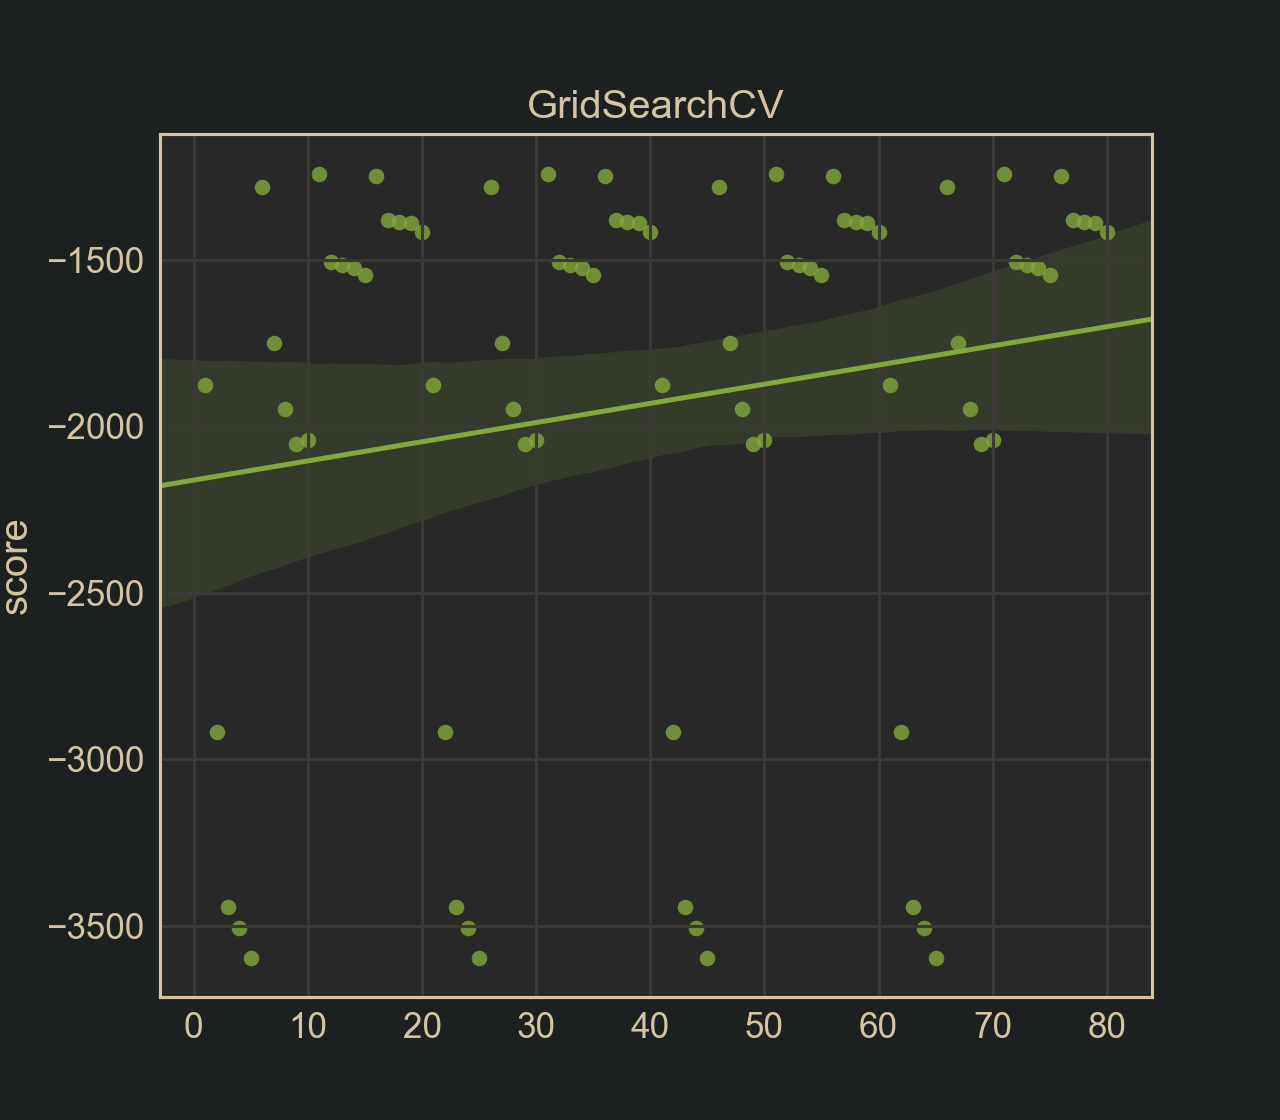

In [9]:
%matplotlib notebook

optimizer.plot(color='g')

## Random Search

In [10]:
model = LGBMRegressor()

# https://lightgbm.readthedocs.io/en/latest/Parameters.html
param_space = {
    'max_depth': (3, 12, 1),
    'num_leaves': {15, 31, 63, 127, 255, 511, 1023, 2047, 4095},

    'bagging_fraction': (0.1, 0.9, 0.05),
    'feature_fraction': (0.1, 0.9, 0.05),
}

optimizer = RandomSearchCV(model, cv, scoring, param_space=param_space, max_iter=50)
optimizer.fit(X_train, y_train)

model = optimizer.best_estimator_

[06:40:13] ITER: 1/50      SCORE: -1510.0740 ± 228.2347      ETA: 24 sec
[06:40:15] ITER: 2/50      SCORE: -1823.8668 ± 356.8841      ETA: 36 sec
[06:40:15] ITER: 3/50      SCORE: -1809.7237 ± 336.2711      ETA: 31 sec
[06:40:16] ITER: 4/50      SCORE: -1508.8063 ± 257.6029      ETA: 27 sec
[06:40:16] ITER: 5/50      SCORE: -7889.4019 ± 729.3220      ETA: 24 sec
[06:40:17] ITER: 6/50      SCORE: -1301.2092 ± 232.7649      ETA: 23 sec
[06:40:18] ITER: 7/50      SCORE: -1468.2790 ± 290.5045      ETA: 25 sec
[06:40:19] ITER: 8/50      SCORE: -1427.0582 ± 256.7935      ETA: 26 sec
[06:40:20] ITER: 9/50      SCORE: -1823.8668 ± 356.8841      ETA: 25 sec
[06:40:20] ITER: 10/50      SCORE: -1427.0582 ± 256.7935      ETA: 23 sec
[06:40:21] ITER: 11/50      SCORE: -1366.7639 ± 272.2196      ETA: 21 sec
[06:40:21] ITER: 12/50      SCORE: -1358.4104 ± 222.0262      ETA: 21 sec
[06:40:22] ITER: 13/50      SCORE: -8131.6719 ± 735.3454      ETA: 21 sec
[06:40:23] ITER: 14/50      SCORE: -3442.7375 ±

In [11]:
_, y_pred = crossval_predict(model, cv, X_train, y_train, X_new=X_test,
                             scoring=scoring, verbose=2, n_jobs=None)

get_score(y_test, y_pred)

[06:40:49]  LGBMRegressor

[06:40:49]  FOLD  0:   -1413.4192
[06:40:49]  FOLD  1:   -787.2192
[06:40:50]  FOLD  2:   -1460.4977
[06:40:50]  FOLD  3:   -1483.8435
[06:40:50]  FOLD  4:   -1049.3087

[06:40:50]  AVERAGE:   -1238.8577 ± 275.5069



-1085.4808424814726

<IPython.core.display.Javascript object>


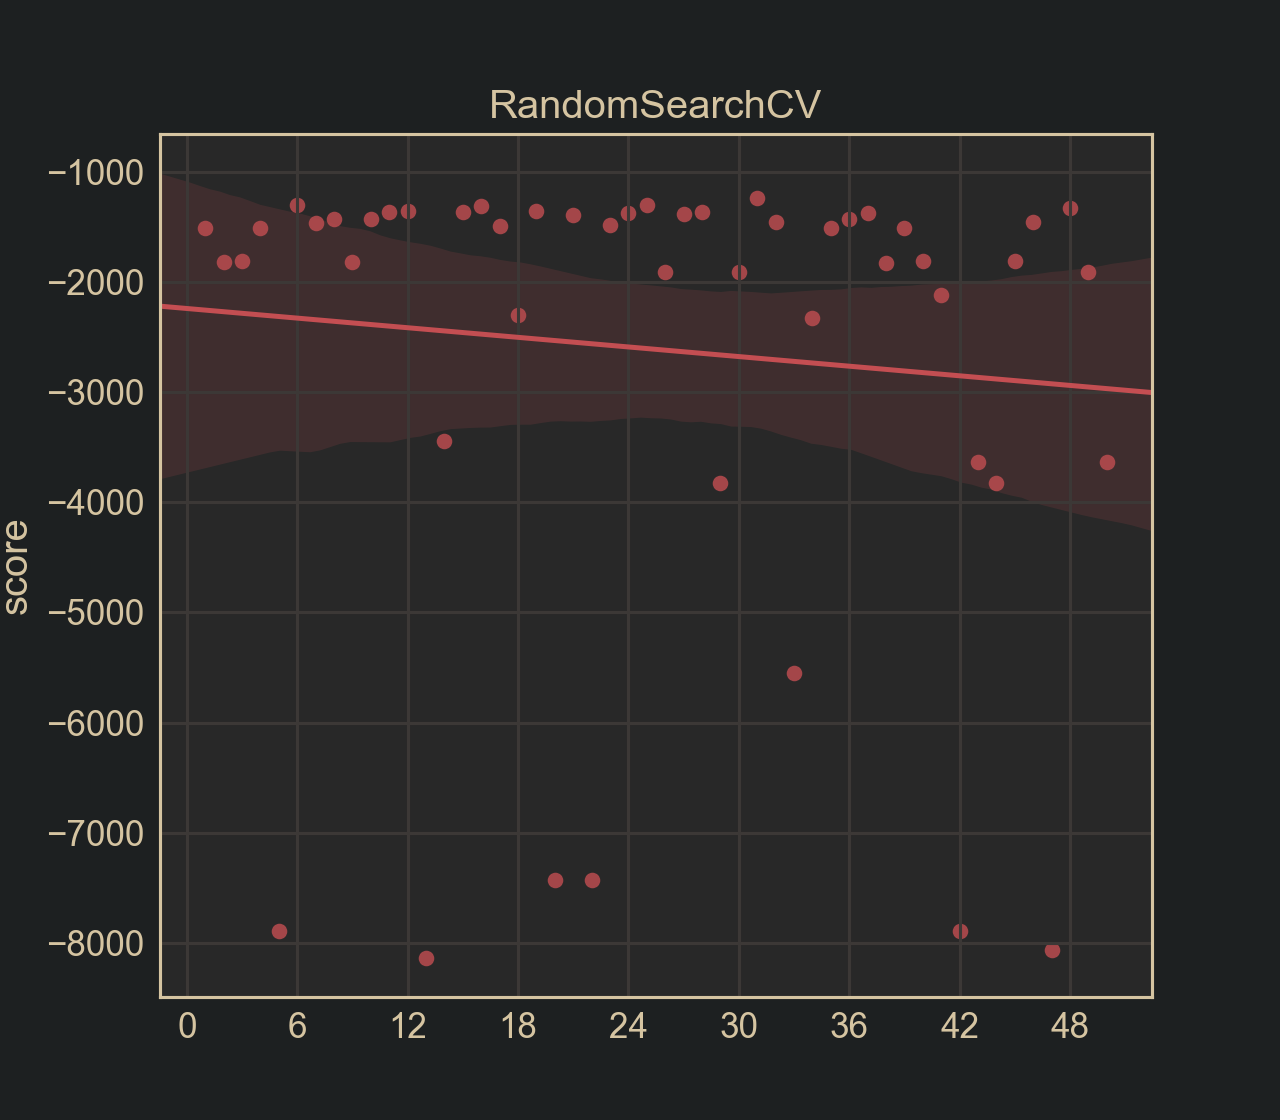

In [12]:
%matplotlib notebook

optimizer.plot(color='r')

## Optuna

In [13]:
model = LGBMRegressor()

# https://lightgbm.readthedocs.io/en/latest/Parameters.html
param_space = {
    'max_depth': (3, 12, 1),
    'num_leaves': {15, 31, 63, 127, 255, 511, 1023, 2047, 4095},

    'bagging_fraction': (0.1, 0.9, 0.05),
    'feature_fraction': (0.1, 0.9, 0.05),
}

optimizer = OptunaCV(model, cv, scoring, param_space=param_space, max_iter=50)
optimizer.fit(X_train, y_train)

model = optimizer.best_estimator_

[06:40:54] ITER: 1/50      SCORE: -1510.0740 ± 228.2347      ETA: 20 sec
[06:40:55] ITER: 2/50      SCORE: -1823.8668 ± 356.8841      ETA: 35 sec
[06:40:56] ITER: 3/50      SCORE: -1809.7237 ± 336.2711      ETA: 30 sec
[06:40:56] ITER: 4/50      SCORE: -1508.8063 ± 257.6029      ETA: 27 sec
[06:40:57] ITER: 5/50      SCORE: -7889.4019 ± 729.3220      ETA: 24 sec
[06:40:57] ITER: 6/50      SCORE: -1301.2092 ± 232.7649      ETA: 24 sec
[06:40:59] ITER: 7/50      SCORE: -1468.2790 ± 290.5045      ETA: 26 sec
[06:41:00] ITER: 8/50      SCORE: -1427.0582 ± 256.7935      ETA: 29 sec
[06:41:01] ITER: 9/50      SCORE: -1823.8668 ± 356.8841      ETA: 27 sec
[06:41:02] ITER: 10/50      SCORE: -1427.0582 ± 256.7935      ETA: 26 sec
[06:41:02] ITER: 11/50      SCORE: -1300.4823 ± 236.3293      ETA: 25 sec
[06:41:03] ITER: 12/50      SCORE: -1311.3966 ± 247.2201      ETA: 23 sec
[06:41:03] ITER: 13/50      SCORE: -1311.3966 ± 247.2201      ETA: 22 sec
[06:41:04] ITER: 14/50      SCORE: -1295.0819 ±

In [14]:
_, y_pred = crossval_predict(model, cv, X_train, y_train, X_new=X_test,
                             scoring=scoring, verbose=2, n_jobs=None)

get_score(y_test, y_pred)

[06:41:27]  LGBMRegressor

[06:41:27]  FOLD  0:   -1428.0298
[06:41:27]  FOLD  1:   -918.6695
[06:41:27]  FOLD  2:   -1357.1606
[06:41:27]  FOLD  3:   -1363.1643
[06:41:27]  FOLD  4:   -1064.9504

[06:41:27]  AVERAGE:   -1226.3949 ± 198.6059



-1055.4341988576548

<IPython.core.display.Javascript object>


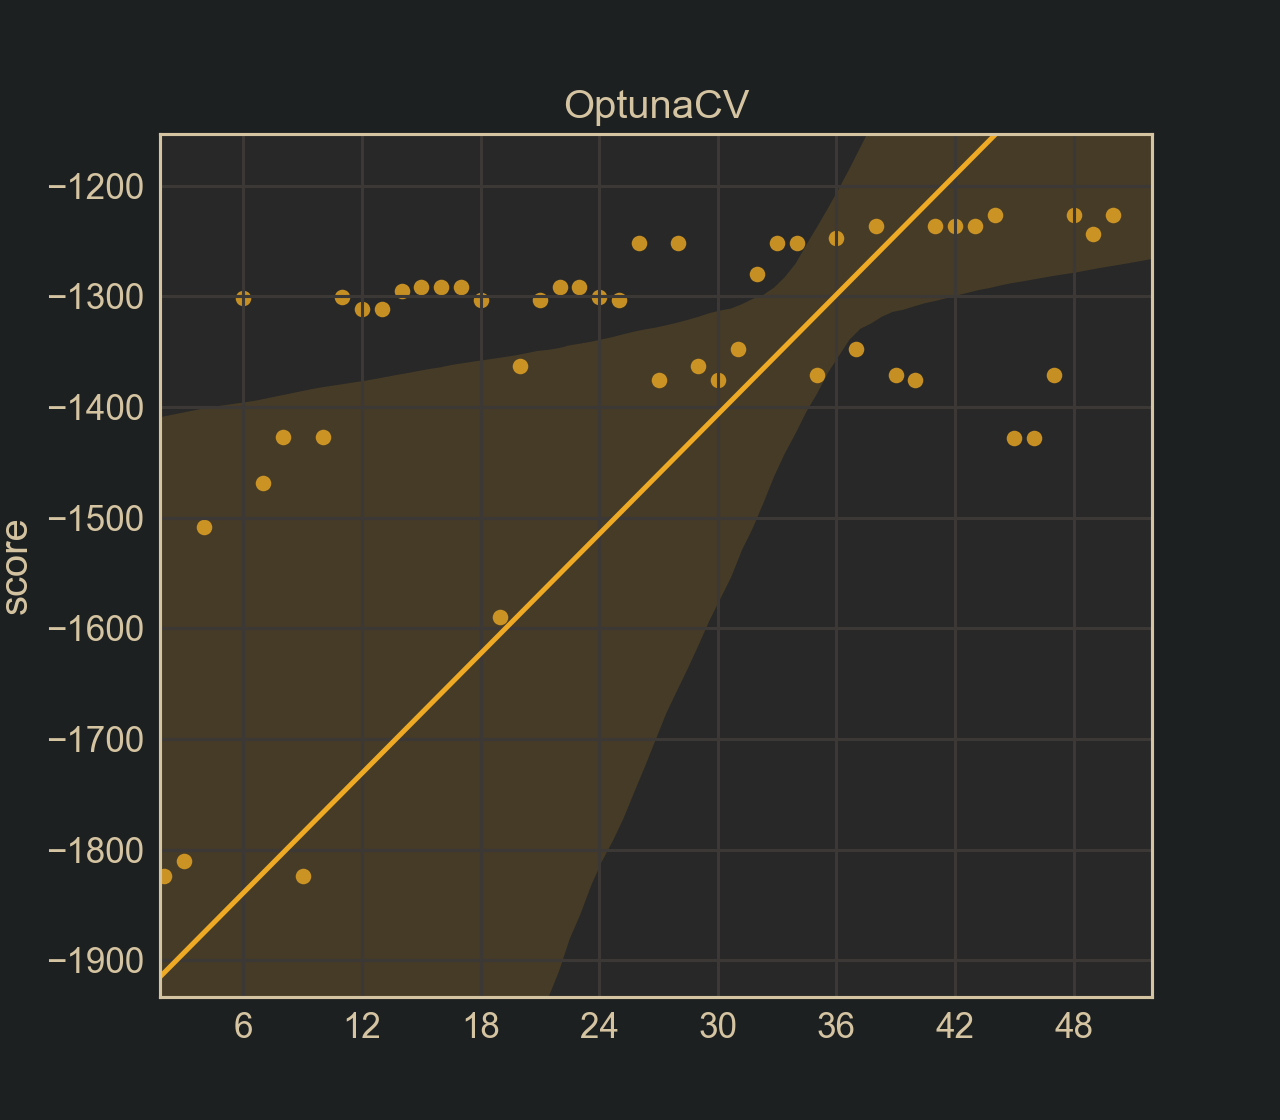

In [15]:
%matplotlib notebook

optimizer.plot()